<a href="https://www.kaggle.com/code/itsmegood/vegetableclassification?scriptVersionId=115975549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
BASE_DIR = "/kaggle/input/vegetable-image-dataset/Vegetable Images"
TRAINING_DIR = "/kaggle/input/vegetable-image-dataset/Vegetable Images/train"
VALIDATION_DIR = "/kaggle/input/vegetable-image-dataset/Vegetable Images/test"

In [3]:
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
                    TRAINING_DIR,
                    target_size=(150,150),
                    class_mode='categorical',
                    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
                            VALIDATION_DIR,
                            target_size=(150,150),
                            class_mode='categorical',
                            batch_size=126
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

# Print the model summary
model.summary()

2023-01-10 07:35:27.251157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 07:35:27.252265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 07:35:27.383738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 07:35:27.384710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-10 07:35:27.385549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [6]:
history = model.fit(train_generator, epochs=25, 
                    validation_data = validation_generator, 
                    verbose = 1, validation_steps=3)

2023-01-10 07:35:32.496377: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-01-10 07:35:36.170858: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


120/120 [==============================] - 173s 1s/step - loss: 2.2012 - accuracy: 0.2465 - val_loss: 1.5431 - val_accuracy: 0.4444
Epoch 2/25
120/120 [==============================] - 116s 965ms/step - loss: 1.5149 - accuracy: 0.4889 - val_loss: 1.1193 - val_accuracy: 0.6032
Epoch 3/25
120/120 [==============================] - 112s 937ms/step - loss: 1.1006 - accuracy: 0.6324 - val_loss: 0.8399 - val_accuracy: 0.7328
Epoch 4/25
120/120 [==============================] - 114s 952ms/step - loss: 0.8634 - accuracy: 0.7189 - val_loss: 0.6467 - val_accuracy: 0.7989
Epoch 5/25
120/120 [==============================] - 124s 1s/step - loss: 0.7234 - accuracy: 0.7727 - val_loss: 0.3774 - val_accuracy: 0.8624
Epoch 6/25
120/120 [==============================] - 130s 1s/step - loss: 0.5770 - accuracy: 0.8167 - val_loss: 0.7162 - val_accuracy: 0.7725
Epoch 7/25
120/120 [==============================] - 127s 1s/step - loss: 0.4820 - accuracy: 0.8504 - val_loss: 0.1860 - val_accuracy: 0.9497
E

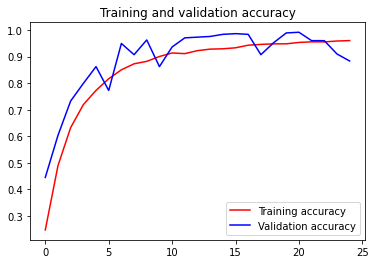

<Figure size 432x288 with 0 Axes>

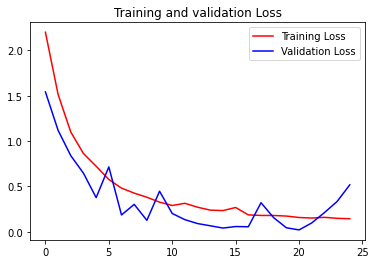

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Testing Model with Random image

In [8]:
!wget https://cdn.britannica.com/16/187216-050-CB57A09B/tomatoes-tomato-plant-Fruit-vegetable.jpg

--2023-01-10 08:28:29--  https://cdn.britannica.com/16/187216-050-CB57A09B/tomatoes-tomato-plant-Fruit-vegetable.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 52.222.139.64, 52.222.139.25, 52.222.139.5, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|52.222.139.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143623 (140K) [image/jpeg]
Saving to: ‘tomatoes-tomato-plant-Fruit-vegetable.jpg’

tomatoes-tomato-pla 100%[===================>] 140.26K   616KB/s    in 0.2s    

2023-01-10 08:28:29 (616 KB/s) - ‘tomatoes-tomato-plant-Fruit-vegetable.jpg’ saved [143623/143623]



Prediction Result:


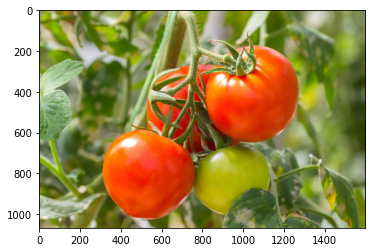

Tomato
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


path = '/kaggle/working/tomatoes-tomato-plant-Fruit-vegetable.jpg'
img = load_img(path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
predicted_class = np.argmax(classes)

# Use the label to determine the folder to save the image in
if predicted_class == 0:
    folder = "Bean"
elif predicted_class == 1:
    folder = "Bitter_Gourd"
elif predicted_class == 2:
    folder = "Bottle_Gourd"
elif predicted_class == 3:
    folder = "Brinjal"
elif predicted_class == 4:
    folder = "Broccoli"
elif predicted_class == 5:
    folder = "Cabbage"
elif predicted_class == 6:
    folder = "Capsicum"
elif predicted_class == 7:
    folder = "Carrot"
elif predicted_class == 8:
    folder = "Cauliflower"
elif predicted_class == 9:
    folder = "Cucumber"
elif predicted_class == 10:
    folder = "Papaya"
elif predicted_class == 11:
    folder = "Potato"
elif predicted_class == 12:
    folder = "Pumpkin"
elif predicted_class == 13:
    folder = "Radish"
else:
    folder = "Tomato"

print("Prediction Result:")
plt.imshow(load_img(path))
plt.show()

print(folder)
print(classes)